### In this notebook, data has been upsampled using SMOTE technique:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import math

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#load the clean data 
df = pd.read_csv("/content/drive/My Drive/Springbaord/capston 2 project/data/bc_data_cleaned.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,1,1,1,2,4,1,1,40,1,1,19,11,1,0
1,47,1,1,1,1,2,1,1,45,1,1,25,9,2,0
2,67,2,1,1,0,1,2,1,25,1,1,4,1,2,1
3,46,2,0,0,0,0,1,1,19,1,1,26,1,2,1
4,63,2,1,1,1,2,1,1,35,1,1,21,5,3,1


In [7]:
#devide the dataset to features and target
X = df.iloc[0:, 0:14]
y = df.iloc[0:, 14]
column = df.columns

In [8]:
#devide the data to test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

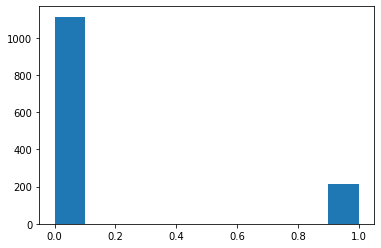

In [9]:
plt.hist(y_test);

In [10]:
#run random forest classification on the data 
clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9028614457831325

In [11]:
confusion_matrix(y_test, clf.predict(X_test))

array([[1089,   24],
       [ 105,  110]])

As seen the number of false negative is high in above dataset therefore we will use SMOTE model to genrate and upsample the minor class in out target dataset. 

In [12]:
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


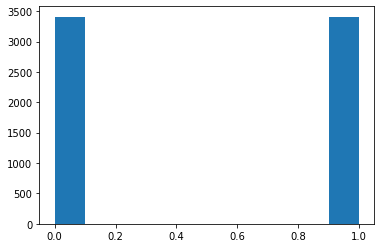

In [13]:
plt.hist(y_smote);

As seen in above histogram the taget has balanced distribuation.

In [53]:
#devide the new upsampled data to train and test
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote, test_size=0.33, random_state=41)

In [54]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train_smote, y_train_smote)
clf.score(X_test_smote, y_test_smote)

0.9231111111111111

We got a better score comparing to out dataset without any synthetic data

In [55]:
confusion_matrix(y_test_smote, clf.predict(X_test_smote))

array([[1058,   78],
       [  95, 1019]])

As seen in the confusion matrix the number of false negative and false positive is really low.

In [56]:
synthetic_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)],axis = 1)

In [57]:
synthetic_data.columns = column

In [58]:
synthetic_data.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
6811,42,1,1,0,0,0,1,1,16,0,0,11,2,12,1
6812,55,0,2,1,1,2,1,1,35,1,0,12,9,36,1
6813,49,0,1,1,2,4,0,0,27,1,1,20,20,13,1
6814,43,2,0,1,0,1,2,1,50,1,1,12,1,31,1
6815,46,2,2,0,0,1,0,1,20,1,1,7,1,75,1


In [60]:
fpath = '/content/drive/My Drive/Springbaord/capston 2 project/data/bc_data_synthetic.csv'
df_numerical.to_csv(fpath, index=False)